## Example from [Fitch2019]

In [1]:
%run ../imports.py

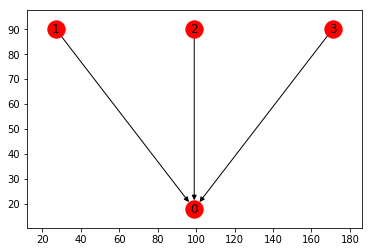

In [2]:
G = nx.DiGraph()
G.add_nodes_from([0,1,2,3])
G.add_edges_from([
    (1,0),
    (2,0),
    (3,0)
])
N = nx.number_of_nodes(G)
nx.draw_networkx(G, pos=graphviz_layout(G, prog='dot'))

In [3]:
L = out_degree_laplacian(G)
np.linalg.matrix_rank(L)

3

### Symmetrization

In [4]:
Q = orth_matrix(L).T
rL = np.matmul(Q, np.matmul(L, np.transpose(Q)))
sigma = solve_lyapunov(rL, np.identity(np.linalg.matrix_rank(L)))
x = 2*np.matmul(np.transpose(Q), np.matmul(sigma, Q))
eqL = np.linalg.pinv(x)

In [5]:
Q

matrix([[-8.66025404e-01,  2.88675135e-01,  2.88675135e-01,
          2.88675135e-01],
        [ 0.00000000e+00,  3.50242117e-16, -7.07106781e-01,
          7.07106781e-01],
        [ 1.96261557e-17,  8.16496581e-01, -4.08248290e-01,
         -4.08248290e-01]])

Create undirected graph from the equivalent Laplacian

In [6]:
eqG = nx.Graph()

for i in np.arange(0,np.shape(eqL)[0]):
    for j in np.arange(i+1,np.shape(eqL)[1]):
        eqG.add_edge(i,j,weight=eqL[i,j])

In [7]:
eqL

matrix([[ 0.75, -0.25, -0.25, -0.25],
        [-0.25,  0.75, -0.25, -0.25],
        [-0.25, -0.25,  0.75, -0.25],
        [-0.25, -0.25, -0.25,  0.75]])

In [8]:
np.linalg.matrix_rank(eqL)

3

In [9]:
posG, negG = separate_graphs(eqL)

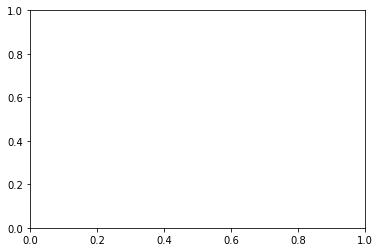

In [10]:
nx.draw_networkx(negG)

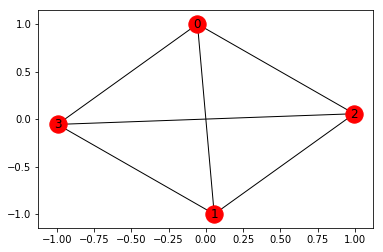

In [12]:
nx.draw_networkx(posG)

In [13]:
eqG = nx.Graph()

for i in np.arange(0,np.shape(eqL)[0]):
    for j in np.arange(i+1,np.shape(eqL)[1]):
        if(np.abs(eqL[i,j]) > 1e-6):
            eqG.add_edge(i,j,weight=eqL[i,j])

In [14]:
g_neg = eqG.subgraph([1,2,3,4,5])

In [15]:
np.linalg.eig(nx.laplacian_matrix(g_neg).todense())

(array([ 1.11022302e-16, -7.50000000e-01, -7.50000000e-01]),
 matrix([[-0.57735027, -0.81649658,  0.10390487],
         [-0.57735027,  0.40824829, -0.75331028],
         [-0.57735027,  0.40824829,  0.64940542]]))

In [16]:
nx.laplacian_matrix(g_neg).todense()

matrix([[-0.5 ,  0.25,  0.25],
        [ 0.25, -0.5 ,  0.25],
        [ 0.25,  0.25, -0.5 ]])

In [17]:
np.divide(x,eqL)

matrix([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [18]:
L

matrix([[ 0,  0,  0,  0],
        [-1,  1,  0,  0],
        [-1,  0,  1,  0],
        [-1,  0,  0,  1]], dtype=int64)

In [19]:
eqL

matrix([[ 0.75, -0.25, -0.25, -0.25],
        [-0.25,  0.75, -0.25, -0.25],
        [-0.25, -0.25,  0.75, -0.25],
        [-0.25, -0.25, -0.25,  0.75]])